### Academic honesty statement



**This is an exam problem. You are required to be in class to work on this. By turning this in you certify that it is your own work you did in class and you have not received any unauthorized assistance.**

Place your academic honesty statement here. Here are some acceptable examples.

-   I worked alone on this assignment.
-   I worked with <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_\_</span></span></span></span> on this assignment.”
-   I received assistance from <span class="underline"><span class="underline"><span class="underline"><span class="underline">\_</span></span></span></span> on this assignment.



### The Antoine equation for vapor pressure



The Antoine equation relates the vapor pressure of a pure liquid to the temperature according to this equation:

$\log_{10} P(T) = A + B / (T + C)$

Use this data to find values for $A, B, C$ and confidence intervals for each parameter.



In [1]:
import numpy as np

TC = np.array([-36.7, -19.6, -11.5, -2.6, 7.6, 15.4, 26.1, 42.2, 60.6, 80.1])  # Temp in degC
P = np.array([1, 5, 10, 20, 40, 60, 100, 200, 400, 760])  # vapor pressure in Torr

# Out [5]:

Plot the data, and your fit over the temperature range of -50 to 100 degC.



# Out [81]:

### solution



There are a few ways to approach this. One way is to fit the log<sub>10</sub> data like this.



# Out [35]:
# output
A =     5.77 95% conf. interval: [5.45421011 6.08047561]
B =  -677.09 95% conf. interval: [-778.37792208 -575.80766078]
C =   153.89 95% conf. interval: [142.12944355 165.64101141]



# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

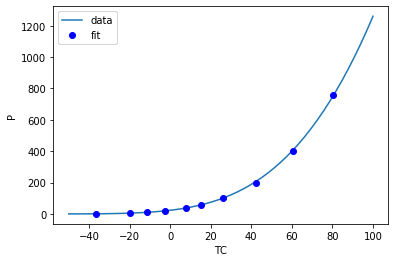

In [1]:
def model(T, A, B, C):
    return A + B / (T + C)

logP = np.log10(P)

from pycse import nlinfit
p, pint, perr = nlinfit(model, TC, logP, (6, -1000, 200))

for label, v, pi in zip(['A', 'B', 'C'], p, pint):
    print(f'{label} = {v: 8.2f} 95% conf. interval: {pi}')

%matplotlib inline
import matplotlib.pyplot as plt

T = np.linspace(-50, 100)
plt.plot(T, 10**model(T, *p))
plt.plot(TC, P, 'bo ')
plt.xlabel('TC')
plt.ylabel('P')
plt.legend(['data', 'fit'])

You can also fit the pressure directly.



# Out [36]:
# output
A =     6.62 95% conf. interval: [6.2704044  6.96176463]
B = -1053.59 95% conf. interval: [-1231.65569419  -875.52570775]
C =   201.95 95% conf. interval: [180.28866061 223.61368466]



# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

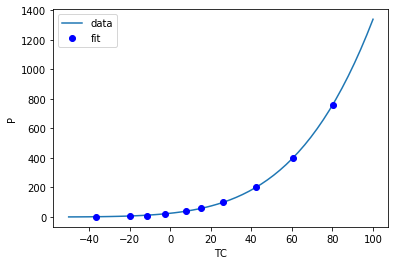

In [1]:
def model(T, A, B, C):
    return 10**(A + B / (T + C))


from pycse import nlinfit
p, pint, perr = nlinfit(model, TC, P, (6, -1000, 200))

for label, v, pi in zip(['A', 'B', 'C'], p, pint):
    print(f'{label} = {v: 8.2f} 95% conf. interval: {pi}')

%matplotlib inline
import matplotlib.pyplot as plt

T = np.linspace(-50, 100)
plt.plot(T, model(T, *p))
plt.plot(TC, P, 'bo ')
plt.xlabel('TC')
plt.ylabel('P')
plt.legend(['data', 'fit'])